# SHAP values
This notebook is intended to describe the absolute effects of the features on the target variable Arrival Delay.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('SHAP.csv')

df3 = df.sample(n = 10000)
df3.to_csv('sample.csv')
df3.head()

,ARR_DELAY,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,ORIGIN_ABE,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,...,AIRLINE_CODE_HA,AIRLINE_CODE_MQ,AIRLINE_CODE_NK,AIRLINE_CODE_OH,AIRLINE_CODE_OO,AIRLINE_CODE_QX,AIRLINE_CODE_UA,AIRLINE_CODE_WN,AIRLINE_CODE_YV,AIRLINE_CODE_YX
2574177,68.0,1859,2147,168.0,1024.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1440464,-16.0,1445,1710,265.0,1750.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
687853,15.0,841,1046,125.0,746.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459170,-14.0,610,930,140.0,957.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2908321,7.0,1910,2217,187.0,1065.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [2]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


100%|===================| 1997/2000 [01:34<00:00]        

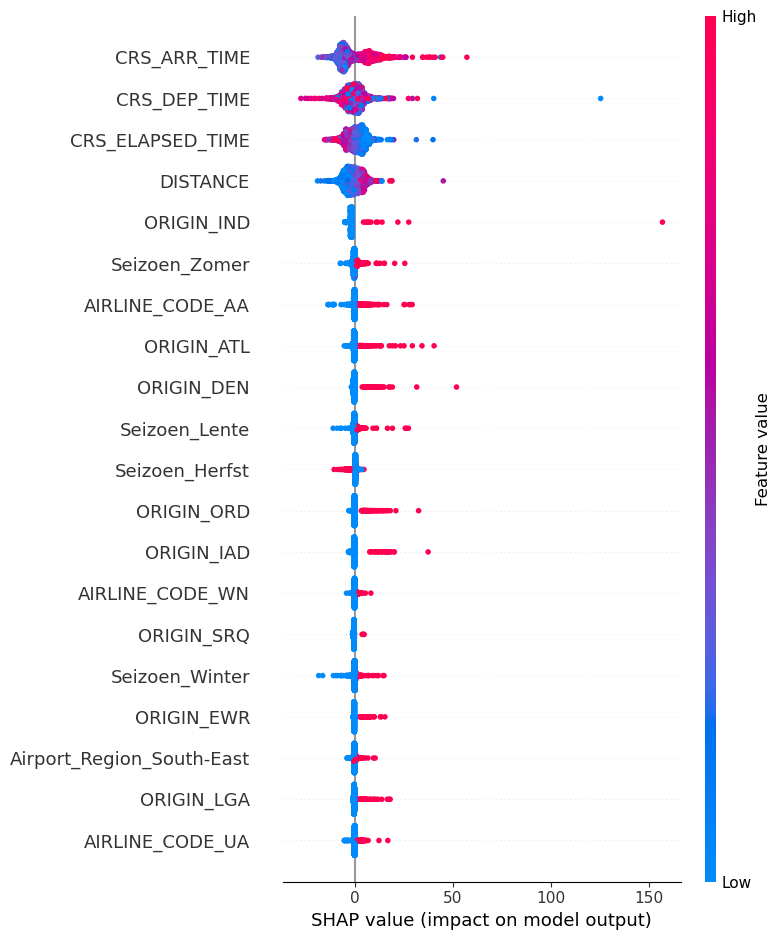

In [3]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X = df3.drop('ARR_DELAY', axis=1)
y = df3['ARR_DELAY']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)


shap_values_array = shap_values.values  
feature_names = X_train.columns         


shap_importance = np.abs(shap_values_array).mean(axis=0)


sorted_idx = np.argsort(shap_importance)[::-1]
top_features = feature_names[sorted_idx][:20]
top_shap_values = shap_values_array[:, sorted_idx][:, :20]

mean_shap_values = shap_values_array.mean(axis=0)
shap.summary_plot(shap_values, X_test)





# Conclusion
These results do in fact have meaning to it. I don't think the scheduled arrival time and departure time are very usable, because the model does not see it as a time, but a number. Elapsed time does reflect reality very nice. Shorter flights (blue) do have more delays because they are planned much tighter and they fly more daily. So they often have more and higher delays. this is reflected nicely in the beeswarm plot. If we move on to airline code AA (american airlines), the beeswarm suggests that you have a higher chance of delays when flying with them. Because this is one hot encoded, it can only be a 0 or 1. 0 is then represented in blue, 1 in red. You can also say that during summer you also have a higher chance on delay. 

## Overall conclusion of this project
Even though it was not possible to create any predictive power out of this dataset, the dataset still can produce usefull things. By using the SHAP values you can make conclusions what features have higher chances of arrival delays. Out of this an advice can be made to the person who is going to plan a trip.